In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
from datetime import timedelta as delta
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd

In [2]:
#Extend of the domain
xmin,xmax = 140, 285 #minimum/maximum longitude (285 = 75deg West)
ymin,ymax = -15, 15  #minimum/maximum latitude

c_lon = 165          #central longitude (variable used to plot between 180deg East and 180deg West)
xten = xmin - c_lon  #variable for plotting (minimum longitude)
xten2 = xmax- c_lon  #variable for plotting (maximum longitude)

In [3]:
#Function for plotting Values in the Tropical Pacific Ocean (not correlation/linear regression figures)
def valueplot(data, value_lim = None, title = "", xlabel = 'longitude (degrees)', ylabel = 'latitude (degrees)',list_ticks =[0],names_ticks=['0'], clabel = "", color = 'BuPu_r'):
    #Generate Figure
    fig = plt.figure(figsize=(9,5),constrained_layout=True)
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=c_lon))

    #Set location for colorbar
    axpos = ax.get_position()
    pos_x = 3*axpos.x0 +0.1
    pos_y = axpos.y0 +0.185
    cax_width = 0.02
    cax_height = axpos.height/2
    pos_cax = fig.add_axes([pos_x,pos_y,cax_width,cax_height])

    #Set labels
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    plt.xticks(rotation=45)
    ax.set_title(title, fontsize = 16)
    plt.rc('font', size=15)
    plt.rc('axes', titlesize=15)
    ax.add_feature(cfeature.COASTLINE)
    
    #Plotting Values
    if value_lim == None: #No boundaries for values are given, let imshow decide.
        im = ax.imshow(data.T,origin ='lower', extent = [xten,xten2, ymin,ymax], cmap = color)
    else: #Boundaries are imposed
        im = ax.imshow(data.T,origin ='lower',vmin= value_lim[0],vmax=value_lim[1], extent = [xten,xten2, ymin,ymax], cmap = color)
    
    #Custom tick labels (e.g. $\pi$ instead of 3.1415)
    if len(list_ticks) > 1:
        cbar = fig.colorbar(im ,cax=pos_cax, extend = 'max', ticks = list_ticks)
        cbar.ax.set_yticklabels(names_ticks)
    
    else: #No custom tick labels
        cbar = fig.colorbar(im ,cax=pos_cax, extend = 'max')
    
    #Setting Grid/Ticks
    cbar.set_label(clabel, rotation=270, labelpad = 20, fontsize = 15)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')
    
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.xlines = False
    gl.ylines = False
    gl.xlocator = mticker.FixedLocator([120,140,160,180,-160,-140,-120,-100,-80])
    gl.ylocator = mticker.FixedLocator([30,20,10,0,-10,-20,-30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

In [4]:
#Function for plotting correlation/linear regression in the Tropical Pacific Ocean with significance of correlation
#Very Similar to valueplot function
def correlationplot(data, p_value, value_lim = [-np.pi/2,np.pi/2], title = "", xlabel = 'longitude (degrees)', ylabel = 'latitude (degrees)',list_ticks =[0],names_ticks=['0'], clabel = "r", color ='bwr'):
    fig = plt.figure(figsize=(9,5),constrained_layout=True)
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=c_lon))

    axpos = ax.get_position()
    pos_x = 3*axpos.x0 +0.1
    pos_y = axpos.y0 +0.185
    cax_width = 0.02
    cax_height = axpos.height/2
    pos_cax = fig.add_axes([pos_x,pos_y,cax_width,cax_height])

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    plt.xticks(rotation=45)
    ax.set_title(title, fontsize = 16)
    plt.rc('font', size=15)
    plt.rc('axes', titlesize=15)
    ax.add_feature(cfeature.COASTLINE)
    im = ax.imshow(data.T, origin ='lower',vmin= value_lim[0],vmax=value_lim[1] ,extent = [xten,xten2, ymin,ymax], cmap = color)
    im2 = ax.contour(XX,YY,1 - p_value.T, levels = [0.95],colors = 'k',linestyles = 'dashed')   #Plotting Statistical significance of correlation
   
    if len(list_ticks) > 1:
        cbar = fig.colorbar(im ,cax=pos_cax, extend = 'both', ticks = list_ticks)
        cbar.ax.set_yticklabels(names_ticks)  
    else:
        cbar = fig.colorbar(im ,cax=pos_cax, extend = 'both')
        
    cbar.set_label(clabel, rotation=270, labelpad = 20, fontsize = 15)
    plt.plot(1000,1001, 'k--', label = 'p = 0.95') #Workaround to make stat. signif. in legend
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')
    
    plt.legend(loc = 'best',bbox_to_anchor=(-.6,1))
    
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.xlines = False
    gl.ylines = False
    gl.xlocator = mticker.FixedLocator([120,140,160,180,-160,-140,-120,-100,-80])
    gl.ylocator = mticker.FixedLocator([30,20,10,0,-10,-20,-30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

In [5]:
data =xr.open_dataset('20062021surface_wholepacific.nc')

end_time = 180
lat,lon = data['lat'].values,data['lon'].values
#time = data['time'].values.astype('datetime64[D]')
lenX,lenY = 291,61

In [6]:
lonEEZ = np.linspace(xmin,xmax,num = lenX)
latEEZ = np.linspace(ymin,ymax, num = lenY)
latlist,lonlist = np.reshape(latEEZ,-1),np.reshape(lonEEZ,-1)
lonEEZ = (lonEEZ[1:] + lonEEZ[:-1])/2 #has to be in center of gridboxes...
latEEZ = (latEEZ[1:] + latEEZ[:-1])/2

#lon[lon<0] = lon[lon<0]+360

lat_i_a=np.digitize(lat,latEEZ)
lon_i_a=np.digitize(lon,lonEEZ)

In [7]:
# res_time_list = []

# #Finding the residence time in the predefined gridboxes
# for i in range(len(lon)):
#     x,y = lon_i_a[i],lat_i_a[i]
#     time_condition = np.where((x != x[0]) | (y != y[0]))
    
#     if len(time_condition[0]) > 0:
#         residence_time = time_condition[0][0]
#     else:
#         residence_time = 180 #insert maximum particle life if particle never left box
#     res_time_list.append(residence_time)

In [14]:
# #Group the residence times per release location
# M= int(len(lat_i_a)/(61*141) - 18) #amount of particle releases in the data
# N= int(61*141)                     #amount of particles per release time

# res_time_cell = np.zeros([M,N])
# for i in range(N):
#     res_time_cell[:,i] = res_time_list[i:-N*18:N]

# #print(res_time_cell)
# t = np.arange('2006-11', '2022-01', dtype='datetime64[D]')
# t = t[:int(M*10):10]
# np.shape(res_time_cell)

In [15]:
#df = pd.DataFrame(np.array(res_time_cell), index=t)#, columns=list("ABCDEF"))

In [16]:
# df_month = df.groupby(pd.PeriodIndex(df.index, freq="M")).mean()
# df_3month = df_month.groupby(np.arange(len(df_month))//4).mean()[1:-1]
# df_year = df.groupby(pd.PeriodIndex(df.index, freq="Y")).mean()
# df_mean = df.mean()
# df_std = df.std()

In [8]:
ENSO34_fulldata = np.genfromtxt('nina34.data', skip_header = 3,skip_footer = 4)
ENSO34_fulldata = ENSO34_fulldata - np.mean(ENSO34_fulldata[42:,],axis = 0)
ENSO34_fulldata[:,0] += 2006.5 
ENSO34_month=np.reshape(ENSO34_fulldata[56:,1:], -1)[10:-6] #in phase with data
#ENSO34_month=np.reshape(ENSO34_fulldata[56:,1:], -1)[9:-7] #1 month out of phase with data
ENSO34_year=np.mean(ENSO34_fulldata[56:,1:], axis = 1)
#ENSO34_3month=np.mean(np.reshape(ENSO34_month[:-2],(3,-1)), axis = 0)

In [18]:
# r_yr = np.zeros(N)
# r_month = np.zeros(N)
# lenX,lenY = 141,61
# #r_3month = np.zeros(N)

# for pc in range(N):
#     r_yr[pc] = np.corrcoef(ENSO34_year,df_year[pc])[1,0]
#     r_month[pc] = np.corrcoef(ENSO34_month,df_month[pc])[1,0]
#     #r_3month[pc] = np.corrcoef(ENSO34_3month,df_3month[pc])[1,0]
    
# r_yr2 = np.reshape(r_yr, (lenX,lenY))
# r_month2 = np.reshape(r_month, (lenX,lenY))
# #r_3month2 = np.reshape(r_3month, (lenX,lenY))
# t_res_mean = np.reshape(np.array(df_mean),(lenX,lenY))
# t_res_std = np.reshape(np.array(df_std),(lenX,lenY))

In [9]:
time_interest = 30 #days + 1 (index is given here, and each index corresponds to 1 day)
loc = np.array([lon[:,0],lat[:,0],lon[:,time_interest],lat[:,time_interest]])
loc[loc>180] = loc[loc>180] - 360
loc = loc*np.pi/180

In [17]:
# haversine formula 
dlon = loc[0,:] - loc[2,:]
dlat = loc[1,:] - loc[3,:]
a = np.sin(dlat/2)**2 + np.cos(loc[1,:]) * np.cos(loc[3,:]) * np.sin(dlon/2)**2

c = 2 * np.arcsin(np.sqrt(a)) 
r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
dist_list = c*r

#Formula for Bearing (angle between two points)
#according to: https://www.igismap.com/formula-to-find-bearing-or-heading-angle-between-two-points-latitude-longitude/
X = np.cos(loc[3,:])*np.sin(dlon)
Y = np.cos(loc[1,:])*np.sin(loc[3,:]) -  np.cos(loc[3,:])*np.sin(loc[1,:])*np.cos(dlon)
bear_list = np.arctan2(X,Y)

In [18]:
M= int(len(loc[0,:])/(lenY*lenX) - 18) #amount of particle releases in the data
N= int(lenY*lenX)                     #amount of particles per release time

dist_cell = np.zeros([M,N])
bear_cell = np.zeros([M,N])
for i in range(N):
    dist_cell[:,i] = dist_list[i:-N*18:N]
    bear_cell[:,i] = bear_list[i:-N*18:N]

#print(res_time_cell)
t = np.arange('2006-11', '2022-01', dtype='datetime64[D]')
t = t[:int(M*10):10]

In [22]:
#transform values from [0,2pi] to [-pi,pi]
#credits go to: https://mika-s.github.io/python/control-theory/kinematics/2017/12/18/transformation-to-pipi.html
def truncated_remainder(dividend, divisor):
    divided_number = dividend / divisor
    divided_number = \
        -int(-divided_number) if divided_number < 0 else int(divided_number)

    remainder = dividend - divisor * divided_number

    return remainder
def transform_to_pipi(input_angle):
    pi = np.pi
    revolutions = int((input_angle + np.sign(input_angle) * pi) / (2 * pi))

    p1 = truncated_remainder(input_angle + np.sign(input_angle) * pi, 2 * pi)
    p2 = (np.sign(np.sign(input_angle)
                  + 2 * (np.sign(np.abs((truncated_remainder(input_angle + pi, 2 * pi))
                                      / (2 * pi))) - 1))) * pi

    output_angle = p1 - p2

    return output_angle

In [23]:
DJF_months = [12, 1, 2]

#write ENSO data into pandas dataframe
ENSO34 = pd.DataFrame(ENSO34_month, index = np.arange('2006-11', '2021-07', dtype='datetime64[M]'))
ENSO34_DJF = ENSO34[ENSO34.index.map(lambda t: t.month in DJF_months)]

#dataframe for distances
df = pd.DataFrame(np.array(dist_cell), index=t)

df_month = df.groupby(pd.PeriodIndex(df.index, freq="M")).mean()
df_DJF = df_month[df_month.index.map(lambda t: t.month in DJF_months)]
df_year = df.groupby(pd.PeriodIndex(df.index, freq="Y")).mean()
df_mean = df.mean()
df_std = df.std()

In [24]:
# from scipy.stats import circmean, circstd

# #dataframe for bearing (angle)
# df2 = pd.DataFrame(np.array(bear_cell), index=t)
# monthly_indices = df2.groupby(pd.PeriodIndex(df2.index, freq="M")).indices.values()
# bear_monthly = np.zeros([N,len(monthly_indices)])
# bear_mean = np.zeros(N)
# bear_std = np.zeros(N)

# #Finding the indices in the bearing data for each month and applying the circular mean to it, in contrast to the regular mean
# for pc in range(N):
#     if pc%1000 == 0:
#         print("Woohoo! The calculation is {}% underway!!!".format(pc/100), "\r",)
#     elif pc == N-1:
#         print("Calculation completed!                         \r",)
#     for T in range(len(monthly_indices)):
#         min_index=np.min(np.array(list(monthly_indices),dtype=object)[T])
#         max_index=np.max(np.array(list(monthly_indices),dtype=object)[T]) + 1
#         mean_angle = circmean(bear_cell[min_index:max_index,pc])
#         bear_monthly[pc,T] = transform_to_pipi(mean_angle)
    
#     bear_mean[pc] = circmean(bear_cell[:,pc])
#     bear_std[pc] = circstd(bear_cell[:,pc])

In [25]:
# t_month = np.arange('2006-11', '2021-07', dtype='datetime64[M]')
# df2_month = pd.DataFrame(bear_monthly.T, index=t_month)
# df2_DJF = df2_month[df2_month.index.map(lambda t: t.month in DJF_months)]

In [26]:

from scipy.stats.stats import pearsonr
#Correlation for distances
r_yr = np.zeros([N,2])
r_month = np.zeros([N,2])
r_DJF = np.zeros([N,2])

for pc in range(N):
    r_yr[pc] =           pearsonr(ENSO34_year,df_year[pc])
    r_month[pc] =        pearsonr(ENSO34_month,df_month[pc])
    r_DJF[pc] =       pearsonr(ENSO34_DJF[0],df_DJF[pc])

r_yr2 = np.reshape(r_yr[:,0], (lenX,lenY))
r_month2 = np.reshape(r_month[:,0], (lenX,lenY))
r_DJF2 = np.reshape(r_DJF[:,0], (lenX,lenY))
p_yr = np.reshape(r_yr[:,1], (lenX,lenY))
p_month = np.reshape(r_month[:,1], (lenX,lenY))
p_DJF = np.reshape(r_DJF[:,1], (lenX,lenY))

disp_mean = np.reshape(np.array(df_mean),(lenX,lenY))
disp_std = np.reshape(np.array(df_std),(lenX,lenY))
disp_mean_w = np.reshape(np.array(df_DJF.mean()),(lenX,lenY))
disp_std_w = np.reshape(np.array(df_DJF.std()),(lenX,lenY))

/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [27]:
# #correlations for bearing
# r_month_bear = np.zeros([N,2])
# r_DJF_bear = np.zeros([N,2])

# for pc in range(N):
#     r_month_bear[pc] =   pearsonr(ENSO34_month,df2_month[pc])
#     r_DJF_bear[pc] =  pearsonr(ENSO34_DJF[0],df2_DJF[pc])

# r_month2_bear = np.reshape(r_month_bear[:,0], (lenX,lenY))
# r_DJF2_bear = np.reshape(r_DJF_bear[:,0], (lenX,lenY))
# p_month_bear = np.reshape(r_month_bear[:,1], (lenX,lenY))
# p_DJF_bear = np.reshape(r_DJF_bear[:,1], (lenX,lenY))

# bear_mean = np.reshape(bear_mean,(lenX,lenY))
# bear_std = np.reshape(bear_std,(lenX,lenY))

In [24]:
lonEEZ = np.linspace(xmin-c_lon,xmax-c_lon,num = lenX)
latEEZ = np.linspace(ymin,ymax, num = lenY)
#lonEEZ[lonEEZ>180] += -360
XX,YY = np.meshgrid(lonEEZ,latEEZ)

/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


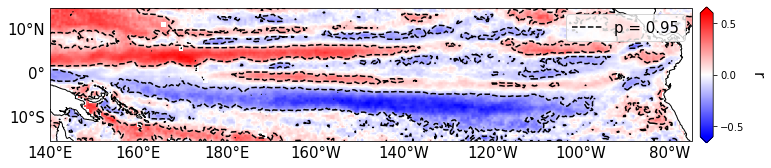

In [29]:
correlationplot(r_month2, p_month, value_lim = [-.6,.6], 
                xlabel = 'longitude (degrees)', ylabel = 'latitude [degrees]', clabel = "r")
#plt.savefig('/nethome/6231640/Temp_Figures/corr_displacement_1month.pdf', bbox_inches='tight')

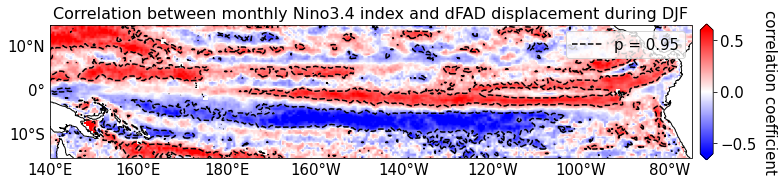

In [30]:
correlationplot(r_DJF2, p_DJF, value_lim = [-.6,.6], title = 'Correlation between monthly Nino3.4 index and dFAD displacement during DJF', 
                xlabel = 'longitude (degrees)', ylabel = 'latitude [degrees]', clabel = "correlation coefficient")
#plt.savefig('/nethome/6231640/Temp_Figures/corrDJF_displacement_1month.pdf', bbox_inches='tight')

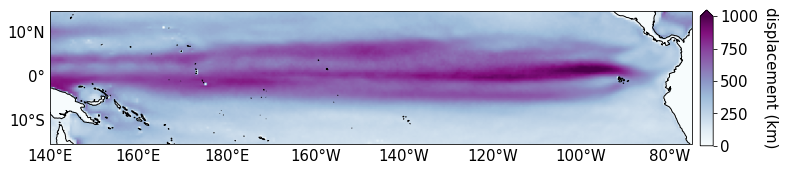

In [31]:
valueplot(disp_mean, clabel = "displacement (km)", value_lim = [0,1000],color = 'BuPu')
plt.savefig('/nethome/6231640/Figs2/disp_surface.pdf', bbox_inches='tight')

/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


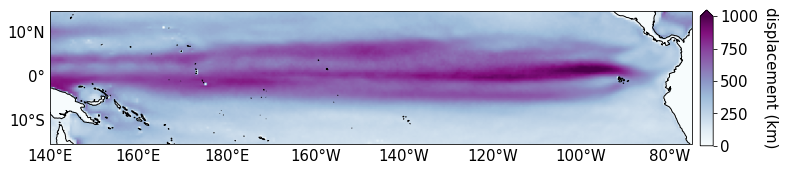

In [32]:
disp_meanload = np.genfromtxt('Temp_Files/disp_mean.txt')
valueplot(disp_meanload, value_lim = [0,1000],clabel = "displacement (km)", color = 'BuPu')
plt.savefig('/nethome/6231640/Figs2/disp_depth.pdf', bbox_inches='tight')

/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


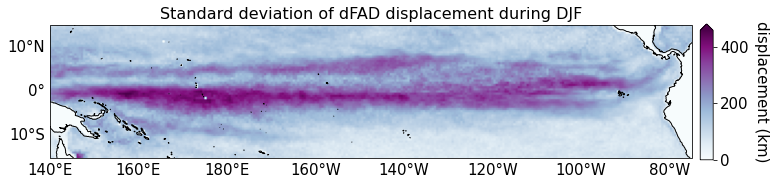

In [33]:
valueplot(disp_std_w, title = 'Standard deviation of dFAD displacement during DJF', clabel = "displacement (km)", color = 'BuPu')
#plt.savefig('/nethome/6231640/Temp_Figures/stdDJF_displacement_1month.pdf', bbox_inches='tight')

In [34]:
correlationplot(r_month2_bear, p_month_bear, value_lim = [-.6,.6], title = 'Correlation between monthly Nino3.4 index and dFAD bearing', 
                xlabel = 'longitude (degrees)', ylabel = 'latitude (degrees)', clabel = "correlation coefficient")
#plt.savefig('/nethome/6231640/Temp_Figures/corr_bearing.pdf', bbox_inches='tight')

NameError: name 'r_month2_bear' is not defined

In [ ]:
correlationplot(r_DJF2_bear, p_DJF_bear, value_lim = [-.6,.6], title = 'Correlation between monthly Nino3.4 index and dFAD bearing during DJF', 
                xlabel = 'longitude (degrees)', ylabel = 'latitude (degrees)', clabel = "correlation coefficient")
#plt.savefig('/nethome/6231640/Temp_Figures/corr_bearing.pdf', bbox_inches='tight')

In [35]:
# # fig = plt.figure(figsize=(20,20),constrained_layout=True)
# # ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=c_lon))
# mask = disp_mean.T > 0

# fig = plt.figure(figsize=(11,10),constrained_layout=True)
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# axpos = ax.get_position()
# pos_x = 4*axpos.x0 +0.35
# pos_y = axpos.y0
# cax_width = 0.03
# cax_height = axpos.height
#     #create new axes where the colorbar should go.
#     #it should be next to the original axes and have the same height!
# pos_cax = fig.add_axes([pos_x,pos_y,cax_width,cax_height])


# # pos_cax = fig.add_axes([pos_x,pos_y+.161,0.02,cax_height/1.76])

# ax.set_ylabel('latitude [degrees]')
# ax.set_xlabel('longitude [degrees]')
# plt.xticks(rotation=45)
# ax.set_title('quiver plot of mean dFAD displacement')


# #im = ax.imshow(method2_diff.T, origin ='lower',vmin = -5,vmax = 5,extent = [xten,xten2, ymin,ymax], cmap = 'bwr')
# quiver = ax.quiver(XX[mask],YY[mask], np.cos(bear_mean.T[mask] + np.pi/2), np.sin(bear_mean.T[mask]+np.pi/2), disp_mean.T[mask])
# cbar = fig.colorbar(quiver,cax=pos_cax, extend = 'max')
# cbar.set_label('distance traveled(km)', rotation=270, labelpad = 20)
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                   linewidth=2, color='gray', alpha=0.5, linestyle='--')
# gl.xlabels_top = False
# gl.ylabels_left = True
# gl.xlines = False
# gl.ylines = False
# # gl.xlocator = mticker.FixedLocator([120,140,160,180,-160,-140])
# # gl.ylocator = mticker.FixedLocator([30,20,10,0,-10,-20,-30])
# gl.xlocator = mticker.FixedLocator([-92,-90,-88])
# gl.ylocator = mticker.FixedLocator([-2,-1,0,1,2,3])
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE)
# # ax.set_xlim(-25,120)
# # ax.set_ylim(-15,15)

In [36]:
# inx = 37+12*61
# t_month = np.arange('2006-11', '2021-07', dtype='datetime64[M]')
# t_year = np.arange('2006-11', '2022-07', dtype='datetime64[Y]')
# plt.plot(t_month,df2_month.values[:,inx], 'b')
# plt.xlabel('time(yr)')
# plt.ylabel('bearing(rad)')
# plt.show()
# plt.plot(t_month,ENSO34_month)
# plt.xlabel('time(yr)')
# plt.ylabel('ENSO index')
# plt.show()
# print(np.corrcoef(ENSO34_month,df2_month.values[:,inx])[1,0])


NameError: name 'mask3' is not defined

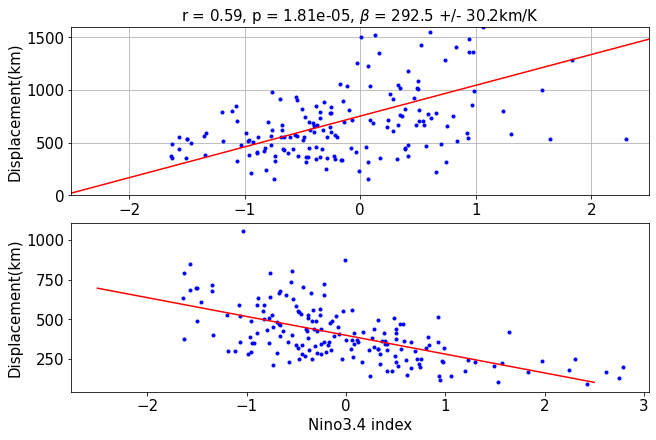

In [37]:
# (0) Importeer het ODR pakket (ODR = Orthogonal Distance Regression)
mask1 = r_month[:,0] > -1
mask2 = r_month[:,0][mask1] == np.max(r_month[:,0][mask1])

mask4 = r_month[:,0][mask1] == np.min(r_month[:,0][mask1])

import scipy.odr as odr
y = df_month.values.T[mask1][mask2][0]
x = ENSO34_month
sig_y = np.ones(len(ENSO34_month))
#sig_x = np.ones(len(ENSO34_DJF))
A_start=100
B_start=100

def f(B, X):
    return B[0] + B[1]*X

## (2) Definieer het model-object om te gebruiken in odr
odr_model = odr.Model(f)
#odr_data  = odr.RealData(x,y[0],sx=sig_x,sy=sig_y)
odr_data  = odr.RealData(x,y.T,sy=sig_y)
odr_obj   = odr.ODR(odr_data,odr_model,beta0=[A_start,B_start])
odr_obj.set_job(fit_type=2) #omdat onzekerheid 0 is in de x richting
odr_res   = odr_obj.run()
par_best = odr_res.beta
par_sig_ext = odr_res.sd_beta #externe onzekerheid
par_cov = odr_res.cov_beta #interne covariantie

# Hide x labels and tick labels for all but bottom plot.
fig, axs = plt.subplots(2, figsize = (9,6),constrained_layout=True)
axs[0].plot(x,y.T,'b.', label = 'Simulated displacement')
axs[0].plot(np.array([-2.5,2.5]),par_best[0]+par_best[1]*np.array([-2.5,2.5]),'r', label = 'linear fit')
axs[0].set_ylabel('Displacement(km)')
axs[0].set_title(r'r = {:.2f}, p = {:.2e}, $\beta$ = {:.1f} +/- {:.1f}km/K'.format(r_DJF[:,0][mask1][mask2][0],r_DJF[:,1][mask1][mask2][0],par_best[1],par_sig_ext[1]))
axs[0].set_xlim(-2.5,2.5)
axs[0].set_ylim(0,1600)
axs[0].grid()
y = df_month.values.T[mask1][mask4][0]
x = np.reshape(ENSO34_month,-1)
sig_y = np.ones(len(ENSO34_month))

odr_data  = odr.RealData(x,y.T,sy=sig_y)
odr_obj   = odr.ODR(odr_data,odr_model,beta0=[A_start,B_start])
odr_obj.set_job(fit_type=2) #omdat onzekerheid 0 is in de x richting
odr_res   = odr_obj.run()
par_best2 = odr_res.beta
par_sig_ext2 = odr_res.sd_beta #externe onzekerheid
par_cov2 = odr_res.cov_beta #interne covariantie



axs[1].plot(x,y.T,'b.', label = 'Simulated displacement')
axs[1].plot(np.array([-2.5,2.5]),par_best2[0]+par_best2[1]*np.array([-2.5,2.5]),'r', label = 'linear fit')
axs[1].set_xlabel('Nino3.4 index')
axs[1].set_ylabel('Displacement(km)')
axs[1].set_title(r'r = {:.2f}, p = {:.2e}, $\beta$ = {:.1f} +/- {:.1f}km/K'.format(r_DJF[:,0][mask3][mask4][0],r_DJF[:,1][mask3][mask4][0],par_best2[1],par_sig_ext2[1]))
axs[1].set_xlim(-2.5,2.5)
axs[1].set_ylim(0,1000)
axs[1].grid()

for ax in axs:
    ax.label_outer()
plt.rc('font', size=15)
plt.rc('axes', titlesize=15)
#plt.savefig('/nethome/6231640/Temp_Figures/regcoefminmaxDJF_displacement.pdf', bbox_inches='tight')

In [60]:
beta_bear = np.zeros([2,N])
beta = np.zeros([2,N])
A_start=200
B_start=10

def f(B, x):
    return B[0] + B[1]*x

for i in range(N):
    y = df_month.values.T[i]
    x = ENSO34_month
    sig_y = np.ones(len(ENSO34_month))
    sig_x = np.ones(len(ENSO34_month))

    odr_model = odr.Model(f)
    odr_data  = odr.RealData(x,y,sy=sig_y)
    odr_obj   = odr.ODR(odr_data,odr_model,beta0=[A_start,B_start])
    odr_obj.set_job(fit_type=2) #omdat onzekerheid 0 is in de x richting
    odr_res   = odr_obj.run()
    par_best = odr_res.beta
    par_sig_ext = odr_res.sd_beta #externe onzekerheid
    beta[0,i] = par_best[1]
    beta[1,i] = par_sig_ext[1]

# for i in range(N):
#     y = df2_month.values.T[i]
#     x = ENSO34_month
#     sig_y = np.ones(len(ENSO34_month))
#     sig_x = np.ones(len(ENSO34_month))

#     odr_model = odr.Model(f)
#     odr_data  = odr.RealData(x,y,sx=sig_x,sy=sig_y)
#     odr_obj   = odr.ODR(odr_data,odr_model,beta0=[A_start,B_start])
#     odr_obj.set_job(fit_type=2) #omdat onzekerheid 0 is in de x richting
#     odr_res   = odr_obj.run()
#     par_best = odr_res.beta
#     par_sig_ext = odr_res.sd_beta #externe onzekerheid
#     beta_bear[0,i] = par_best[1]
#     beta_bear[1,i] = par_sig_ext[1] 

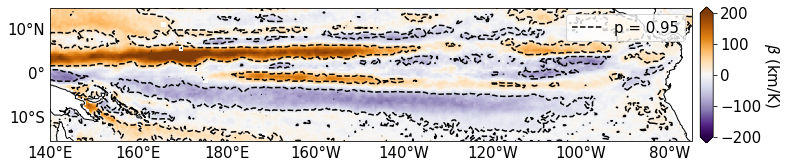

In [63]:
beta_new = np.reshape(beta[0,:], (lenX,lenY))
beta_std = np.reshape(beta[1,:], (lenX,lenY))
# beta_new_bear = np.reshape(beta_bear[0,:], (lenX,lenY))
# beta_std_bear = np.reshape(beta_bear[1,:], (lenX,lenY))

correlationplot(beta_new, p_month, value_lim = [-200,200], 
                xlabel = 'longitude (degrees)', ylabel = 'latitude (degrees)', clabel = r"$\beta$ (km/K)", color = 'PuOr_r')
plt.savefig('/nethome/6231640/Temp_Figures/regcoef_displacement_1month.pdf', bbox_inches='tight')

In [40]:
# correlationplot(beta_new_bear, p_month_bear, value_lim = [-np.pi/2,np.pi/2], title = 'linear regression coefficient for monthly Nino3.4 index and bearing', 
#                 xlabel = 'longitude (degrees)', ylabel = 'latitude (degrees)', clabel = "regression coefficient (rad/K)")
# #plt.savefig('/nethome/6231640/Temp_Figures/regcoef_bearing_1month.pdf', bbox_inches='tight')

In [41]:
ENSO34_corrected = ENSO34_month
T_Nino = np.where(ENSO34_corrected > 1)[0]
T_Nina = np.where(ENSO34_corrected < -1)[0]

mask_T_Nino =np.zeros(len(T_Nino),dtype = bool)
mask_T_Nina =np.zeros(len(T_Nina),dtype = bool)

meme = np.zeros(len(T_Nino)-1)
for i in range(1,len(T_Nino)-1):
    if np.logical_and(T_Nino[i] == T_Nino[i+1]-1, T_Nino[i] == T_Nino[i-1]+1):
        mask_T_Nino[i],mask_T_Nino[i+1],mask_T_Nino[i-1] = True,True,True

for i in range(1,len(T_Nina)-1):
    if np.logical_and(T_Nina[i] == T_Nina[i+1]-1, T_Nina[i] == T_Nina[i-1]+1):
        mask_T_Nina[i],mask_T_Nina[i+1],mask_T_Nina[i-1] = True,True,True
        
Nino_event = T_Nino[mask_T_Nino]
Nina_event = T_Nina[mask_T_Nina]

In [42]:
disp_Nino = df_month.iloc[Nino_event]
disp_Nina = df_month.iloc[Nina_event]
bear_Nino = df2_month.iloc[Nino_event]
bear_Nina = df2_month.iloc[Nina_event]

NameError: name 'df2_month' is not defined

In [ ]:
bear_Nino_mean,bear_Nina_mean = np.zeros([lenX*lenY]),np.zeros([lenX*lenY])

disp_Nino_mean = np.reshape(np.array(disp_Nino.mean()),(lenX,lenY))
disp_Nina_mean = np.reshape(np.array(disp_Nina.mean()),(lenX,lenY))

for i in range(lenX*lenY):
    bear_Nino_mean[i] = transform_to_pipi(circmean(bear_Nino[i]))
    bear_Nina_mean[i] = transform_to_pipi(circmean(bear_Nina[i]))
    
bear_Nino_mean = np.reshape(bear_Nino_mean,(lenX,lenY))
bear_Nina_mean = np.reshape(bear_Nina_mean,(lenX,lenY))

In [ ]:
# fig = plt.figure(figsize=(20,20),constrained_layout=True)
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=c_lon))
# mask = disp_mean.T > 0
# axpos = ax.get_position()
# pos_x = 3*axpos.x0 +0.1
# pos_y = axpos.y0 +0.185
# cax_width = 0.02
# cax_height = axpos.height/2
#     #create new axes where the colorbar should go.
#     #it should be next to the original axes and have the same height!
# pos_cax = fig.add_axes([pos_x,pos_y+.161,0.02,cax_height/1.76])

# ax.set_ylabel('latitude [degrees]')
# ax.set_xlabel('longitude [degrees]')
# plt.xticks(rotation=45)
# ax.set_title('quiver plot of mean dFAD displacement')


# #im = ax.imshow(method2_diff.T, origin ='lower',vmin = -5,vmax = 5,extent = [xten,xten2, ymin,ymax], cmap = 'bwr')
# quiver = ax.quiver(XX[mask],YY[mask], np.cos(bear_Nino_mean.T[mask] + np.pi/2), np.sin(bear_Nino_mean.T[mask]+np.pi/2), disp_Nino_mean.T[mask])
# cbar = fig.colorbar(quiver,cax=pos_cax, extend = 'max')
# cbar.set_label('distance traveled(km)', rotation=270, labelpad = 20)
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                   linewidth=2, color='gray', alpha=0.5, linestyle='--')
# gl.xlabels_top = False
# gl.ylabels_left = True
# gl.xlines = False
# gl.ylines = False
# gl.xlocator = mticker.FixedLocator([120,140,160,180,-160,-140])
# gl.ylocator = mticker.FixedLocator([30,20,10,0,-10,-20,-30])
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE)
# ax.set_xlim(-25,120)
# ax.set_ylim(-15,15)

In [ ]:
# fig = plt.figure(figsize=(20,20),constrained_layout=True)
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=c_lon))
# mask = disp_mean.T > 0
# axpos = ax.get_position()
# pos_x = 3*axpos.x0 +0.1
# pos_y = axpos.y0 +0.185
# cax_width = 0.02
# cax_height = axpos.height/2
#     #create new axes where the colorbar should go.
#     #it should be next to the original axes and have the same height!
# pos_cax = fig.add_axes([pos_x,pos_y+.161,0.02,cax_height/1.76])

# ax.set_ylabel('latitude [degrees]')
# ax.set_xlabel('longitude [degrees]')
# plt.xticks(rotation=45)
# ax.set_title('quiver plot of mean dFAD displacement during la Niña')


# #im = ax.imshow(method2_diff.T, origin ='lower',vmin = -5,vmax = 5,extent = [xten,xten2, ymin,ymax], cmap = 'bwr')
# quiver = ax.quiver(XX[mask],YY[mask], np.cos(bear_Nina_mean.T[mask] + np.pi/2), np.sin(bear_Nina_mean.T[mask]+np.pi/2), disp_Nina_mean.T[mask])
# cbar = fig.colorbar(quiver,cax=pos_cax, extend = 'max')
# cbar.set_label('distance traveled(km)', rotation=270, labelpad = 20)
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                   linewidth=2, color='gray', alpha=0.5, linestyle='--')
# gl.xlabels_top = False
# gl.ylabels_left = True
# gl.xlines = False
# gl.ylines = False
# gl.xlocator = mticker.FixedLocator([120,140,160,180,-160,-140])
# gl.ylocator = mticker.FixedLocator([30,20,10,0,-10,-20,-30])
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE)
# ax.set_xlim(-25,120)
# ax.set_ylim(-15,15)

In [43]:
# calculate total travel distance instead of total displacement
dist_trav = np.zeros(len(lon))
for i in range(time_interest): 
    dlon = (lon[:,i] - lon[:,i+1])*np.pi/180
    dlat = (lat[:,i] - lat[:,i+1])*np.pi/180
    a = np.sin(dlat/2)**2 + np.cos(lat[:,i+1]*np.pi/180) * np.cos(lat[:,i]*np.pi/180) * np.sin(dlon/2)**2

    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    dist_trav += c*r

In [44]:
# as a measure of 'eddiness' divide the displacement by the total travel distance. values closer to 0 are more eddiness on a certain timescale.
M= int(len(loc[0,:])/(lenY*lenX) - 18) #amount of particle releases in the data
N= int(lenY*lenX)                     #amount of particles per release time
eddy = dist_list/dist_trav #
trav_cell = np.zeros([M,N])
eddy_cell = np.zeros([M,N])
for i in range(N):
    eddy_cell[:,i] = eddy[i:-N*18:N]
    trav_cell[:,i] = dist_trav[i:-N*18:N]
    
eddy_mean = np.mean(eddy_cell, axis = 0)
trav_mean = np.mean(trav_cell, axis = 0)
eddy_mean = np.reshape(eddy_mean,(lenX,lenY))
trav_mean = np.reshape(trav_mean,(lenX,lenY))

/tmp/ipykernel_124414/1045518424.py:4: RuntimeWarning: invalid value encountered in true_divide
  eddy = dist_list/dist_trav #


In [45]:
df_eddy = pd.DataFrame(eddy_cell, index=t)
df_eddy_month = df_eddy.groupby(pd.PeriodIndex(df_eddy.index, freq="M")).mean()
df_eddy_Nino = df_eddy_month.iloc[Nino_event].mean()
df_eddy_Nina = df_eddy_month.iloc[Nina_event].mean()

eddy_plot_Nino = np.reshape(np.array(df_eddy_Nino), (lenX,lenY))
eddy_plot_Nina = np.reshape(np.array(df_eddy_Nina), (lenX,lenY))

In [46]:
r_eddy = np.zeros([N,2])
masknew = np.sum(np.isnan(df_eddy_month))
for pc in range(N):
    if masknew[pc] <0:
        r_eddy[pc] =        pearsonr(ENSO34_month,np.array(df_eddy_month[pc]))
    else:
        r_eddy[pc] = [0,1]

r_eddy2 = np.reshape(r_eddy[:,0], (lenX,lenY))
p_eddy2 = np.reshape(r_eddy[:,1], (lenX,lenY))

In [ ]:
valueplot(eddy_mean, value_lim = [0.2, 1], 
                xlabel = 'longitude (degrees)', ylabel = 'latitude (degrees)', clabel = "ratio", color = 'BuPu')
plt.savefig('/nethome/6231640/Figs2/eddy_diff_surfdepth.pdf', bbox_inches='tight')

In [ ]:
valueplot(eddy_plot_Nino, value_lim = [0.2, 1], 
                xlabel = 'longitude (degrees)', ylabel = 'latitude (degrees)', clabel = "ratio", color = 'BuPu')
plt.savefig('/nethome/6231640/Figs2/eddyratio_Nino_1month_surf.pdf', bbox_inches='tight')

In [ ]:
valueplot(eddy_plot_Nina, value_lim = [0.2, 1], 
                xlabel = 'longitude (degrees)', ylabel = 'latitude (degrees)', clabel = "ratio", color = 'BuPu')
plt.savefig('/nethome/6231640/Figs2/eddyratio_Nina_1month_surf.pdf', bbox_inches='tight')

In [ ]:
Nino_event

In [10]:
#finding loopiness
lonloop = lon[:,:time_interest]
latloop = lat[:,:time_interest]

In [13]:
#Formula for Bearing (angle between two points)
#according to: https://www.igismap.com/formula-to-find-bearing-or-heading-angle-between-two-points-latitude-longitude/
lonloop1 = lonloop[:,:-1]*np.pi/180
lonloop2 = lonloop[:,1:]*np.pi/180
latloop1 = latloop[:,:-1]*np.pi/180
latloop2 = latloop[:,1:]*np.pi/180

dlonloop = lonloop2 - lonloop1
dlatloop = latloop2 - latloop1

Xloop = np.cos(latloop2)*np.sin(dlonloop)
Yloop = np.cos(latloop1)*np.sin(latloop2) -  np.cos(latloop2)*np.sin(latloop1)*np.cos(dlonloop)
bear_loop = np.arctan2(Xloop,Yloop)
bear_loop = bear_loop[:-18*N]

In [14]:
bear_loop2 = bear_loop[:,1:] - bear_loop[:,:-1] #difference between angles
bear_loop2[bear_loop2 > np.pi] += - 2*np.pi
bear_loop2[bear_loop2 <= -np.pi] +=  2*np.pi

In [15]:
#abs_sum_angle = np.sum(np.abs(bear_loop2), axis = 1)
sum_angle = np.sum(bear_loop2, axis = 1)

sum_angle_cell = np.zeros([M,N])
# #abs_sum_angle_cell = np.zeros([M,N])

for i in range(N):
    sum_angle_cell[:,i] = sum_angle[i::N]
    #abs_sum_angle_cell[:,i] = abs_sum_angle[i:-N*18:N]
#attempt_cell = xr.open_dataset('d50_absangle_1month.nc')    
#abs_sum_angle_cell = attempt_cell.rel_angle.values
# attempt_cell = xr.open_dataset('d50_angle_1month.nc')    
# sum_angle_cell = attempt_cell.rel_angle.values

sum_angle_mean = np.mean(sum_angle_cell, axis = 0)
# #abs_sum_angle_mean = np.mean(abs_sum_angle_cell, axis = 0)
sum_angle_mean= np.reshape(sum_angle_mean,(lenX,lenY))
# #abs_sum_angle_mean = np.reshape(abs_sum_angle_mean,(lenX,lenY))

In [19]:
df_loop = pd.DataFrame(sum_angle_cell, index=t)
df_loop_month = df_loop.groupby(pd.PeriodIndex(df_loop.index, freq="M")).mean()
# df_loop_Nino = df_loop_month.iloc[Nino_event].mean()
# df_loop_Nina = df_loop_month.iloc[Nina_event].mean()

# loop_Nino = np.reshape(np.array(df_loop_Nino), (lenX,lenY))
# loop_Nina = np.reshape(np.array(df_loop_Nina), (lenX,lenY))

In [20]:
from scipy.stats.stats import pearsonr
#Correlation for loopiness

r_loop = np.zeros([N,2])


for pc in range(N):
    r_loop[pc] =        pearsonr(ENSO34_month,df_loop_month[pc])

r_loop2 = np.reshape(r_loop[:,0], (lenX,lenY))
p_loop = np.reshape(r_loop[:,1], (lenX,lenY))

/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [21]:
# np.savetxt('/nethome/6231640/Temp_Files/corr_loop.txt', r_loop2)
# np.savetxt('/nethome/6231640/Temp_Files/signi_loop.txt', p_loop)
# np.savetxt('/nethome/6231640/Temp_Files/disp_mean.txt', disp_mean)
# np.savetxt('/nethome/6231640/Temp_Files/corr_disp.txt', r_month2)
# np.savetxt('/nethome/6231640/Temp_Files/signi_disp.txt', p_month)
# np.savetxt('/nethome/6231640/Temp_Files/coef_disp.txt', beta_new)

In [22]:
import scipy.odr as odr
A_start = 0
B_start = 10
beta = np.zeros([2,N])

def f(B, x):
    return B[0] + B[1]*x

for i in range(N-4):
    y = df_loop_month.values.T[i]
    x = ENSO34_month
    sig_y = np.ones(len(ENSO34_month))
    sig_x = np.ones(len(ENSO34_month))

    odr_model = odr.Model(f)
    odr_data  = odr.RealData(x,y,sy=sig_y)
    odr_obj   = odr.ODR(odr_data,odr_model,beta0=[A_start,B_start])
    odr_obj.set_job(fit_type=2) #omdat onzekerheid 0 is in de x richting
    odr_res   = odr_obj.run()
    par_best = odr_res.beta
    par_sig_ext = odr_res.sd_beta #externe onzekerheid
    beta[0,i] = par_best[1]
    beta[1,i] = par_sig_ext[1]

loop_beta = np.reshape(np.array(beta[0]), (lenX,lenY))

In [ ]:
sum_angle_mean[sum_angle_mean==0]=0
pi = np.pi
valueplot(sum_angle_mean, list_ticks = [-3*pi,-2*pi,-pi, 0,pi,2*pi,3*pi], names_ticks = [r'-3$\pi$',r'-2$\pi$',r'-$\pi$','0',r'$\pi$',r'2$\pi$',r'3$\pi$'],
                xlabel = 'longitude (degrees)', ylabel = 'latitude (degrees)', clabel = "loopiness (rad)", color = 'bwr',value_lim = [-10,10])
plt.savefig('/nethome/6231640/Figs2/loopiness_1month_surf.pdf', bbox_inches='tight')

In [ ]:
loop_Nino[loop_Nino==0]=0

valueplot(loop_Nino, title = 'Loopiness during el Niño', 
                xlabel = 'longitude (degrees)', ylabel = 'latitude (degrees)', clabel = "loopiness (rad)", color = 'bwr',value_lim = [-10,10])
#plt.savefig('/nethome/6231640/Temp_Figures/loopiness_Nino_1month.pdf', bbox_inches='tight')

In [ ]:
loop_Nina[loop_Nina==0]=0

valueplot(loop_Nina, title = 'Loopiness during la Niña', 
                xlabel = 'longitude (degrees)', ylabel = 'latitude (degrees)', clabel = "loopiness (rad)", color = 'bwr',value_lim = [-10,10])
#plt.savefig('/nethome/6231640/Temp_Figures/loopiness_Nina_1month.pdf', bbox_inches='tight')

In [ ]:
correlationplot(r_loop2, p_loop, value_lim = [-.5,.5], xlabel = 'longitude (degrees)', ylabel = 'latitude (degrees)', clabel = "r")
plt.savefig('/nethome/6231640/Figs2/corr_loopiness_1month_surf.pdf', bbox_inches='tight')

/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


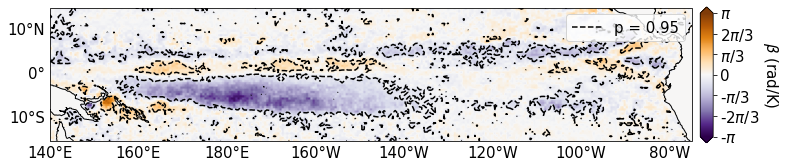

In [26]:
pi = np.pi
correlationplot(loop_beta, p_loop, value_lim = [-np.pi,np.pi], xlabel = 'longitude (degrees)', ylabel = 'latitude (degrees)', 
                list_ticks = [-pi,-2*pi/3,-pi/3, 0,pi/3,2*pi/3,pi], names_ticks = [r'-$\pi$',r'-2$\pi$/3',r'-$\pi$/3','0',r'$\pi$/3',r'2$\pi$/3',r'$\pi$'],
                clabel = r"$\beta$ (rad/K)", color = 'PuOr_r')
plt.savefig('/nethome/6231640/Figs2/reg_loopiness_1month_surface.pdf', bbox_inches='tight')

In [ ]:
# supereddy_Nino = loop_Nino*(1-eddy_plot_Nino)

# valueplot(supereddy_Nino, title = 'Eddy detection parameter during el Niño', 
#                 xlabel = 'longitude (degrees)', ylabel = 'latitude (degrees)', clabel = "parameter value (rad)")
# #plt.savefig('/nethome/6231640/Temp_Figures/eddy_param_Nino_1month.pdf', bbox_inches='tight')

In [ ]:
# supereddy = sum_angle_mean*(1-eddy_mean)

# valueplot(supereddy, title = 'Eddy detection parameter', 
#                 xlabel = 'longitude (degrees)', ylabel = 'latitude (degrees)', clabel = "parameter value (rad)")
# #plt.savefig('/nethome/6231640/Temp_Figures/eddy_param_1month.pdf', bbox_inches='tight')

In [ ]:
# import netCDF4 as nc

# fn = '/nethome/6231640/d50_angle_1month.nc'
# ds = nc.Dataset(fn, 'w', format='NETCDF4')

# times = ds.createDimension('times', None)
# L_zon = ds.createDimension('lat', len(YY[:,0]))
# L_mer = ds.createDimension('lon', len(XX[0]))

# lats = ds.createVariable('lat', 'f4', ('lat',))
# lons = ds.createVariable('lon', 'f4', ('lon',))
# timetime = ds.createVariable('timetime', 'f4', ('times',))
                           
# rel_angle = ds.createVariable('rel_angle', 'f4', ('times'))
# rel_angle.units = 'rad'
                           
# lats[:] = YY[:,0]
# lons[:] = XX[0]
# timetime[:] = t
# rel_angle[:] = sum_angle_cell
                           
# ds.close()

In [109]:
gigawigalijst = np.reshape(bear_loop2, -1)
len(gigawigalijst)

266407008

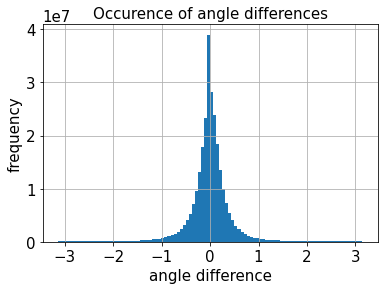

In [114]:
plt.hist(gigawigalijst, bins = 100)
plt.title('Occurence of angle differences')
plt.grid()
plt.xlabel('angle difference')
plt.ylabel('frequency')
plt.savefig('/nethome/6231640/Temp_Figures/histogram.pdf', bbox_inches='tight')

(array([[289., 356., 347., ...,   6.,   9.,   6.],
        [269., 274., 293., ...,   7.,   7.,   7.],
        [236., 280., 302., ...,  10.,  12.,   6.],
        ...,
        [ 30.,  40.,  31., ...,  13.,  13.,  10.],
        [ 40.,  36.,  44., ...,  11.,  11.,   9.],
        [ 38.,  25.,  32., ...,  12.,   9.,   8.]]),
 array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
        -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
        -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
        -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
        -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
        -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,
         0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,
         0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,
         0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,
         0.62,  0.64,  0.66,  0.68,  0.7

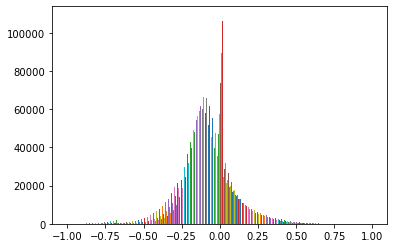

In [11]:
plt.hist(lon[:1000000,1:]-lon[:1000000,:-1], bins = 100, range = [-1,1])

In [14]:
np.nanmean(np.abs(lon[:,1:]-lon[:,:-1]))/4

0.12201671620116089

In [15]:
1/12

0.08333333333333333